# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # for Celsius
    units = "metric"  

    # Create endpoint URL with each city    
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    #print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | thunder bay
Processing Record 3 of Set 1 | forfar
Processing Record 4 of Set 1 | san andros
City not found. Skipping...
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | wailua homesteads
Processing Record 7 of Set 1 | dickinson
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | happy valley-goose bay
Processing Record 10 of Set 1 | kingston
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | qamdo
Processing Record 14 of Set 1 | tazacorte
Processing Record 15 of Set 1 | darwin
Processing Record 16 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | mchinji
Processing Record 21 of

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,23.08,100,100,2.99,EC,1715508712
1,thunder bay,48.4001,-89.3168,12.99,47,75,2.06,CA,1715508712
2,forfar,56.6431,-2.8903,17.20,81,100,3.79,GB,1715508713
3,adamstown,-25.0660,-130.1015,20.20,65,0,2.67,PN,1715508661
4,wailua homesteads,22.0669,-159.3780,21.24,85,75,3.09,US,1715508715


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,23.08,100,100,2.99,EC,1715508712
1,thunder bay,48.4001,-89.3168,12.99,47,75,2.06,CA,1715508712
2,forfar,56.6431,-2.8903,17.20,81,100,3.79,GB,1715508713
3,adamstown,-25.0660,-130.1015,20.20,65,0,2.67,PN,1715508661
4,wailua homesteads,22.0669,-159.3780,21.24,85,75,3.09,US,1715508715


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

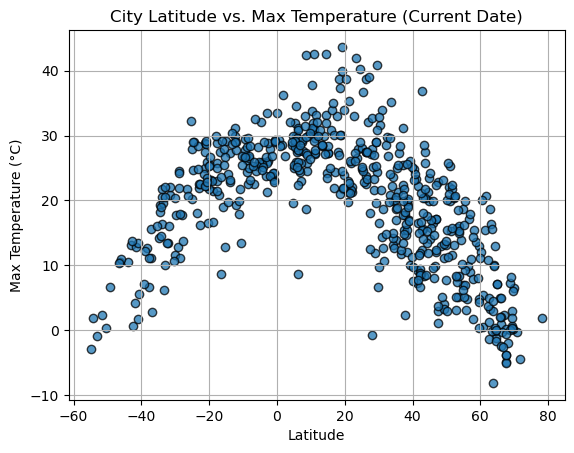

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

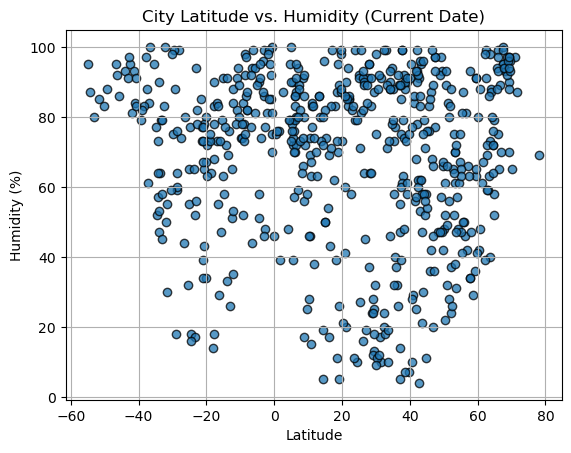

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

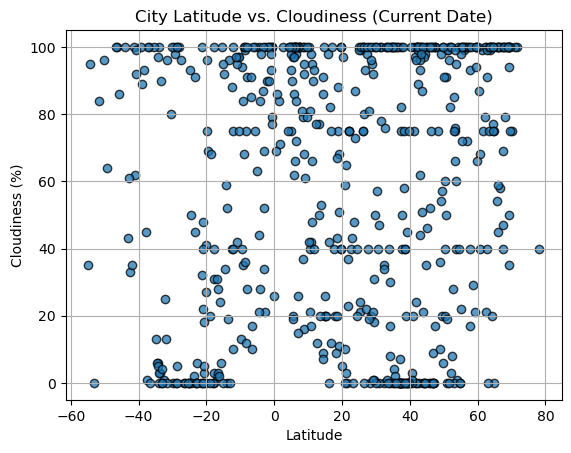

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

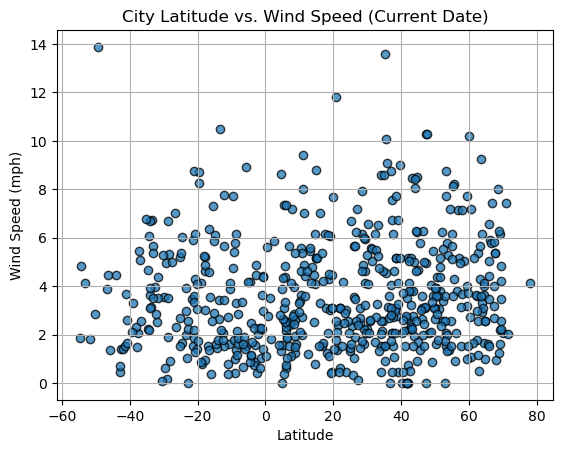

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression values
    regress_values = x_values * slope + intercept

    # Create equation of line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create scatter plot
    plt.scatter(x_values,y_values)

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate the line equation
    plt.text(text_coordinates[0], text_coordinates[1], line_eq, fontsize=12, color="red")

    # Set labels and title
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"{title} vs. Latitude Linear Regression")

    # Print r-value
    print(f"The r-value is: {rvalue}")

    # Save the plot as a figure
    plt.savefig(f"output_data/{title}_vs_Latitude_LinearRegression.png")

    # Show plot
    plt.show()



In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thunder bay,48.4001,-89.3168,12.99,47,75,2.06,CA,1715508712
2,forfar,56.6431,-2.8903,17.20,81,100,3.79,GB,1715508713
4,wailua homesteads,22.0669,-159.3780,21.24,85,75,3.09,US,1715508715
5,dickinson,29.4608,-95.0513,24.43,87,100,4.12,US,1715508715
6,bilibino,68.0546,166.4372,-2.05,93,79,0.95,RU,1715508665


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,23.08,100,100,2.99,EC,1715508712
3,adamstown,-25.0660,-130.1015,20.20,65,0,2.67,PN,1715508661
9,margaret river,-33.9500,115.0667,16.36,90,100,3.65,AU,1715508718
13,darwin,-12.4611,130.8418,29.99,51,40,2.06,AU,1715508582
16,port-aux-francais,-49.3500,70.2167,6.59,88,64,13.88,TF,1715508663


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7907555584743606


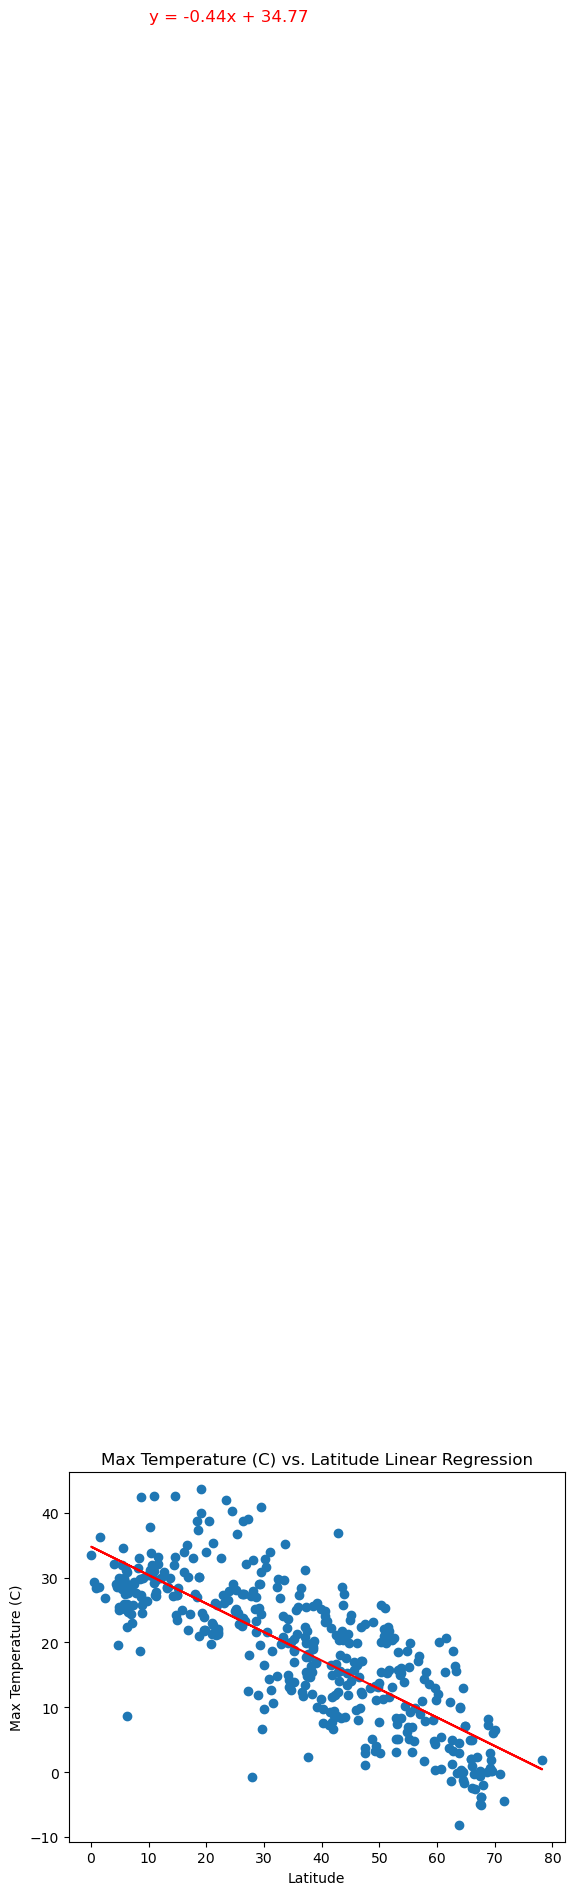

In [18]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temperature (C)", (10,270))

The r-value is: 0.7803430801108131


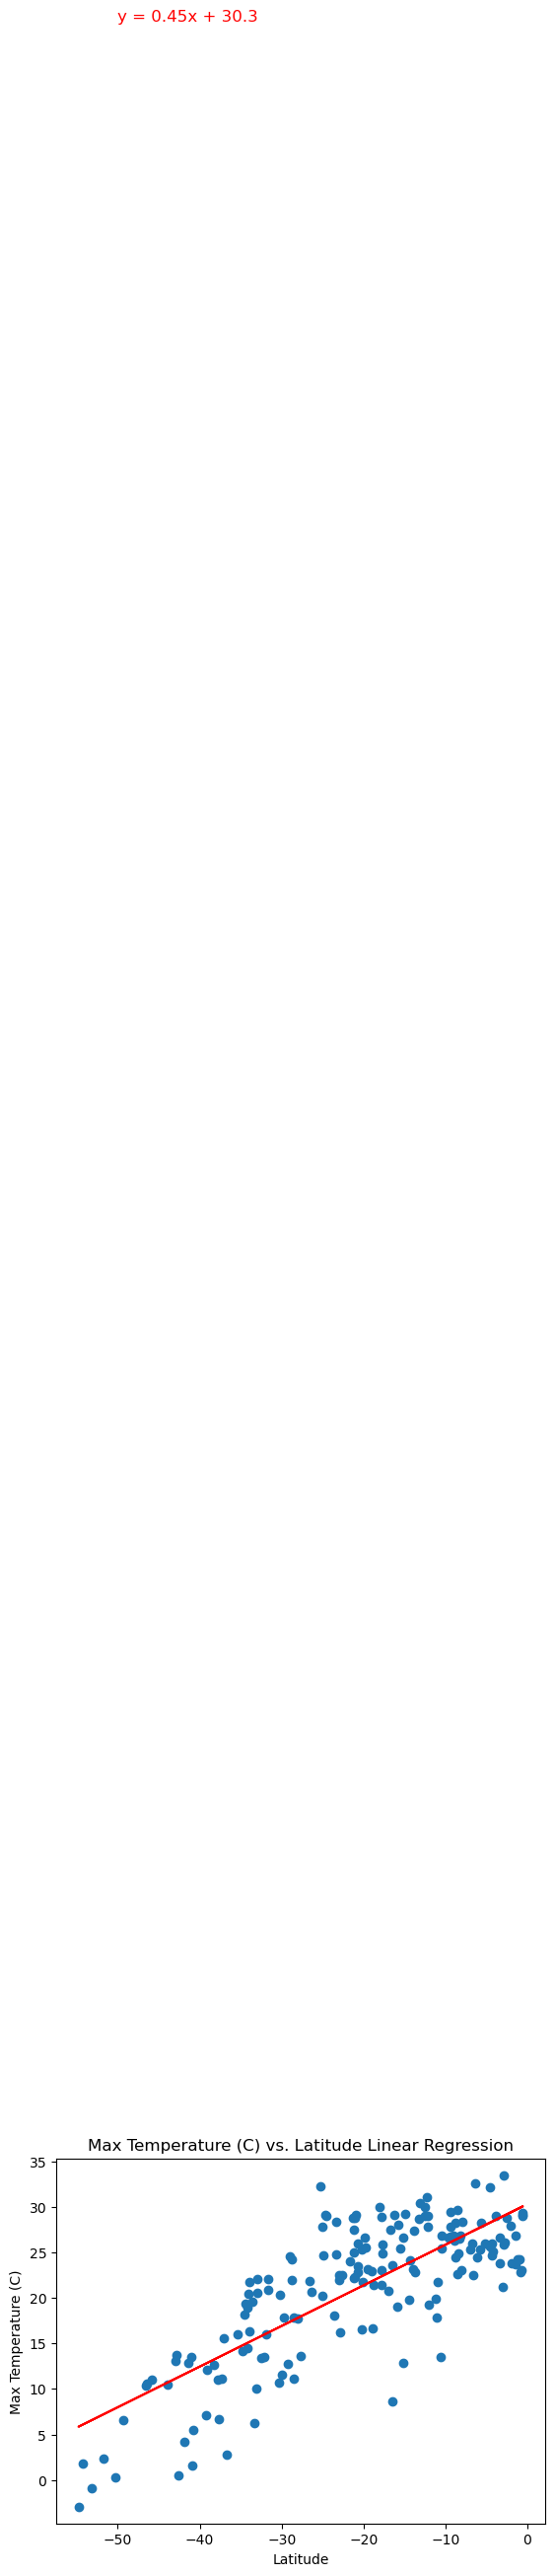

In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temperature (C)", (-50,270))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04797930274929451


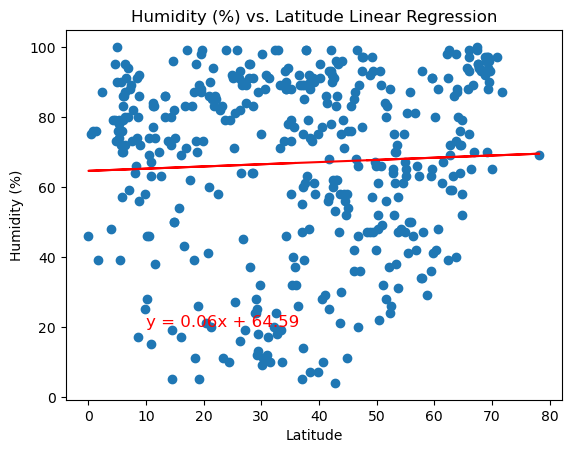

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity (%)", (10,20))

The r-value is: -0.004858389720985986


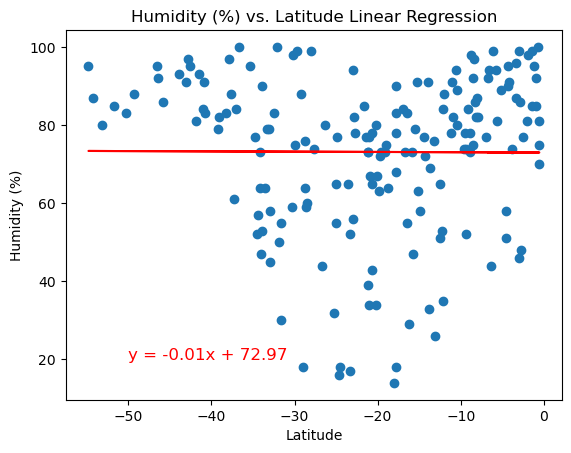

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity (%)", (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05372715339962999


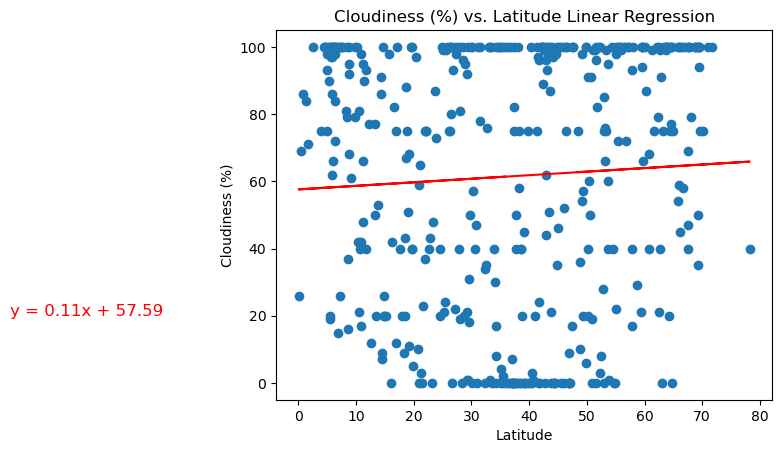

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness (%)", (-50,20))

The r-value is: 0.12228261218136222


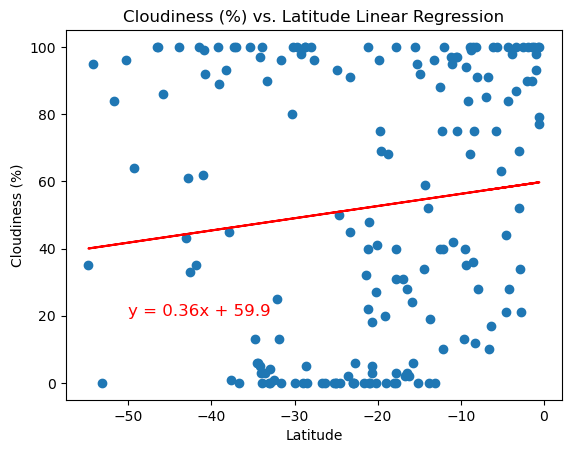

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness (%)", (-50,20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07884029911465402


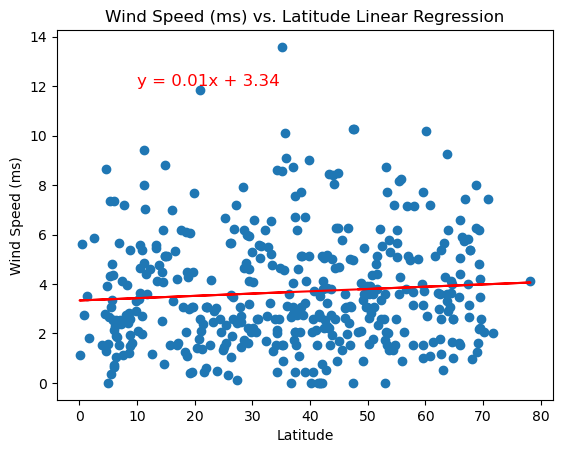

In [26]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed (ms)", (10,12))


The r-value is: -0.13545843894935966


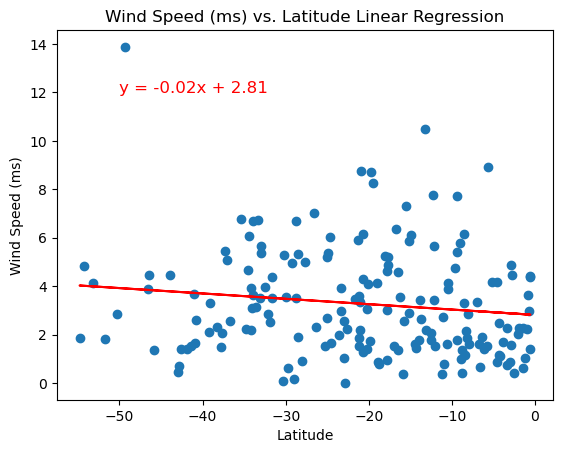

In [29]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed (ms)", (-50,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE